<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Using Time Series Data and Datetime

_Authors: Samuel Stack (DC)_

---

This lab covers the basics of manipulating datetime objects and using datetimes in Pandas.

### 1) Create a datetime object representing today's date.

In [65]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# A:
datetime.today()

datetime.datetime(2018, 3, 19, 15, 17, 35, 647722)

### 2) Write a function to print the day of the week for a datetime object.

In [26]:
# A:
def dow(dt_obj):
    days = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Weds',
        3: 'Thurs',
        4: 'Fri',
        5: 'Sat',
        6: 'Sun'
    }
    return days[dt_obj.weekday()]

dow(datetime.today())

### 3) What is the Gregorian ordinal representation of today's date? What is the difference in days between the ordinal representation of today's date and the ordinal representation of your birthday?

> *Hint: Use `.toordinal()` to get the ordinal representation. This calculates the number of days between your birthday and today's date.

In [28]:
# A:
bd = datetime(1989, 11, 5)

In [33]:
# Ryan are 28 years!
(datetime.today().toordinal() - bd.toordinal()) / 365

28.386301369863013

### 4) Try using `timedelta()` to shift our datetime object by the following intervals.
- One hour ahead.
- Three days ago.
- One year, three days, two seconds ahead.

In [50]:
# A:
# +1 hour
offset = timedelta(hours=1)
print('now: {}\n+1 hr: {}'.format(datetime.today(), datetime.today() + offset))

now: 2018-03-19 15:41:09.906142
+1 hr: 2018-03-19 16:41:09.906154


In [52]:
# 3 days ago
offset = timedelta(days=-3)
print('now: {}\n3 days ago: {}'.format(datetime.today(), datetime.today() + offset))

now: 2018-03-19 15:42:17.376146
3 days ago: 2018-03-16 15:42:17.376154


In [55]:
# +1y +3d +2s
offset = timedelta(days=365*3+3, seconds=2)
print('now: {}\n+1y +3d +2s: {}'.format(datetime.today(), datetime.today() + offset))

now: 2018-03-19 15:45:48.561772
+1y +3d +2s: 2021-03-21 15:45:50.561778


### 5) Load one of the stock CSVs in the `datasets` folder.

Which you choose is up to you!

In [58]:
# A:
!ls datasets

aapl.csv  goog.csv  vow.csv


### 6) Take a high-level look at the data. Describe it. What are we looking at? 

Use a plotting function to provide a good visual.

In [60]:
# A:
df = pd.read_csv('./datasets/vow.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,16-Jan-17,150.05,150.70,147.75,148.40,79341
1,13-Jan-17,151.85,154.00,149.95,151.75,112464
2,12-Jan-17,154.05,154.30,148.85,150.70,173155
3,11-Jan-17,149.05,153.65,148.80,153.15,181285
4,10-Jan-17,148.05,149.85,146.60,148.10,137786


In [63]:
# A: convert date col to datetime
df['Date'] = pd.to_datetime(df.copy()['Date'])

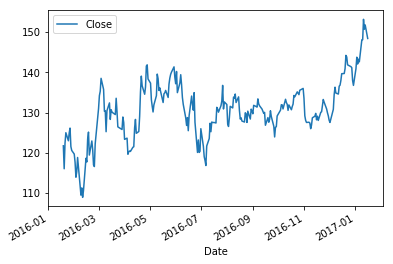

In [71]:
df.plot(x='Date', y='Close', kind='line')

### 7) Examine the Date column. Make it the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in six Series objects indexed by DateTime — a literal time series!

In [74]:
# A:
df.set_index('Date', drop=False, inplace=True)

### 8) Add columns with useful data extracted from the DateTime index.

Create at least three columns; one for day, month, and year.


In [80]:
# A:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [81]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Day,Month,Year
Date,,,,,,,,,
2017-01-16,2017-01-16,150.05,150.7,147.75,148.40,79341,16,1,2017
2017-01-13,2017-01-13,151.85,154.0,149.95,151.75,112464,13,1,2017


### 9) Create a subset of the data containing only 2017 dates.

In [83]:
# A:
df[df['Year'] == 2017].head(2)

,Date,Open,High,Low,Close,Volume,Day,Month,Year
Date,,,,,,,,,
2017-01-16,2017-01-16,150.05,150.7,147.75,148.40,79341,16,1,2017
2017-01-13,2017-01-13,151.85,154.0,149.95,151.75,112464,13,1,2017


### 10) [Example] Date ranges and frequencies.

Explore the following built-in methods.
- What does `asfreq` do?
> - _Converts time series to specified frequency._

- What does `resample` do?
> - _This is a convenience method for frequency conversion and the resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex) or pass datetime-like values to the `on` or `level` keyword._

We can also create our own date ranges using a built-in function, `date_range()`. The `periods` and `freq` keyword arguments grant the user fine-grained control over the resulting values. To reset the time data, use the `normalize=True` directive.


In [84]:
# from a to b, increment by days
pd.date_range('3/1/2016', '6/1/2016')

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-12',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20',
               '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
               '2016-03-25', '2016-03-26', '2016-03-27', '2016-03-28',
               '2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01',
               '2016-04-02', '2016-04-03', '2016-04-04', '2016-04-05',
               '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-09',
               '2016-04-10', '2016-04-11', '2016-04-12', '2016-04-13',
               '2016-04-14', '2016-04-15', '2016-04-16', '2016-04-17',
               '2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
               '2016-04-22', '2016-04-23', '2016-04-24', '2016-04-25',
      

In [85]:
# from a, increment 20 days
pd.date_range(start='3/1/2016', periods=20)

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-12',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20'],
              dtype='datetime64[ns]', freq='D')

In [86]:
# from b, backward 20 days
pd.date_range(end='6/1/2016', periods=20)

DatetimeIndex(['2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
               '2016-05-25', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-05-30', '2016-05-31', '2016-06-01'],
              dtype='datetime64[ns]', freq='D')

In [89]:
# Frequency specifies the length of the periods — the default, "D," 
# being daily. We understand that BM is bimonthly.
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
pd.date_range('3/19/2018', '4/11/2018', freq='W-MON')

DatetimeIndex(['2018-03-19', '2018-03-26', '2018-04-02', '2018-04-09'], dtype='datetime64[ns]', freq='W-MON')

In [92]:
# Normalize creates normal daily times and will set the 
# default time for each day as midnight.
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a `Period` object, which can be used to represent a time interval. The `Period` object consists of a start time and an end time and can be created by providing a start time and a given frequency.

In [94]:
# Our start period was March 2016 and our period frequency is months.
march_2016 = pd.Period('2016-03', freq='M')

print(march_2016.start_time)
print(march_2016.end_time)

2016-03-01 00:00:00
2016-03-31 23:59:59.999999999
